# THIS MODEL IS BUILT TO PREDICT THE AMOUNT OF MILES PER GALLON (MPG) USAGE OF VEHICLES BASED ON SOME INDEPENDENT VARIABLES PROVIDED

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

In [5]:
#Read in the dataset
mpg_df = pd.read_csv('auto-mpg1.csv')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# DATA PREPROCESSING

In [7]:
# Because the car name is not a major determinant of fuel consumption, we are to drop it
mpg_drop = mpg_df.drop(['car name'], axis = 1)

In [8]:
# Handling Missing Values
#Check the column 'horsepower' datatype
print(mpg_drop['horsepower'].dtype)

object


In [9]:
#replacing all cells in the column horsepower that has ? with an average score (ensure column is numeric first)
mpg_drop['horsepower']=mpg_drop['horsepower'].replace('?', np.nan) #replace with NaN if it is a string
mpg_drop['horsepower']=mpg_drop['horsepower'].astype(float) #convert the column to float

#replace NaN with the average score
mpg_drop['horsepower'].fillna(mpg_drop['horsepower'].mean(), inplace = True)

print(mpg_drop['horsepower'].dtype)

float64


C:\Users\DEEBEE\AppData\Local\Temp\ipykernel_18224\2598817609.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mpg_drop['horsepower'].fillna(mpg_drop['horsepower'].mean(), inplace = True)


In [10]:
# Encode Categorical Variables
mpg_drop['origin'] = mpg_drop['origin'].astype('category')
# Convert the categories to integers (0, 1, 2)
mpg_drop['origin'] = mpg_drop['origin'].cat.codes

In [11]:
# Encode Categorical Variables
mpg_drop['cylinders'] = mpg_drop['cylinders'].astype('category')
mpg_drop['cylinders'] = mpg_drop['cylinders'].cat.codes

In [12]:
mpg_drop.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,2.195980,193.425879,104.469388,2970.424623,15.568090,76.010050,0.572864
std,7.815984,1.328541,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,0.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,1.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,1.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,0.000000
75%,29.000000,4.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,4.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,2.000000


In [13]:
mpg_drop.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,4,307.0,130.0,3504,12.0,70,0
1,15.0,4,350.0,165.0,3693,11.5,70,0
2,18.0,4,318.0,150.0,3436,11.0,70,0
3,16.0,4,304.0,150.0,3433,12.0,70,0
4,17.0,4,302.0,140.0,3449,10.5,70,0


In [14]:
mpg_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int8   
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int8   
dtypes: float64(4), int64(2), int8(2)
memory usage: 19.6 KB


In [15]:
#CHECKING FOR MISSING VALUES
missing_values = mpg_drop.isnull().sum()
missing_values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

# STANDARDISATION

In [17]:
#Declare inputs and targets
mpg_preprocessed = mpg_drop.copy()
targets = mpg_preprocessed['mpg']
inputs = mpg_preprocessed.drop(['mpg'], axis = 1)

In [18]:
Scaler=StandardScaler()
Scaler.fit(inputs)

StandardScaler()

In [19]:
inputs_scaled = Scaler.transform(inputs)
inputs_scaled

array([[ 1.35960466,  1.0906037 ,  0.66919608, ..., -1.29549834,
        -1.62742629, -0.71514478],
       [ 1.35960466,  1.5035143 ,  1.58659918, ..., -1.47703779,
        -1.62742629, -0.71514478],
       [ 1.35960466,  1.19623199,  1.19342642, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [-0.90135351, -0.56103873, -0.53653371, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [-0.90135351, -0.70507731, -0.66759129, ...,  1.10082237,
         1.62198339, -0.71514478],
       [-0.90135351, -0.71467988, -0.58895674, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [56]:
y = mpg_preprocessed['mpg']
x1 = mpg_preprocessed[['cylinders', 'displacement',	'horsepower',	'weight',	'acceleration',	'model year',	'origin']]
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.9
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          2.20e-143
Time:                        07:48:43   Log-Likelihood:                -1035.6
No. Observations:                 398   AIC:                             2087.
Df Residuals:                     390   BIC:                             2119.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.3832      4.420     -3.933      0.000     -26.074      -8.693
cylinders       -1.1995      0.360     -3.335      0.001      -1.907      -0.492
displacement     0.0273      0.007      3.844      0.000       0.013       0.041
horsepower      -0.0185      0.013     -1.403      0.161      -0.045       0.007
weight          -0.0065      0.001    -10.253      0.000      -0.008      -0.005
acceleration     0.1000      0.095      1.053      0.293      -0.087       0.287
model year       0.7522      0.050     15.091      0.000       0.654       0.850
origin           1.4061      0.271      5.198      0.000       0.874       1.938
==============================================================================
Omnibus:                       33.475   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.885
Skew:                           0.532   Prob(JB):                     2.69e-13
Kurtosis:                       4.536   Cond. No.                     8.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

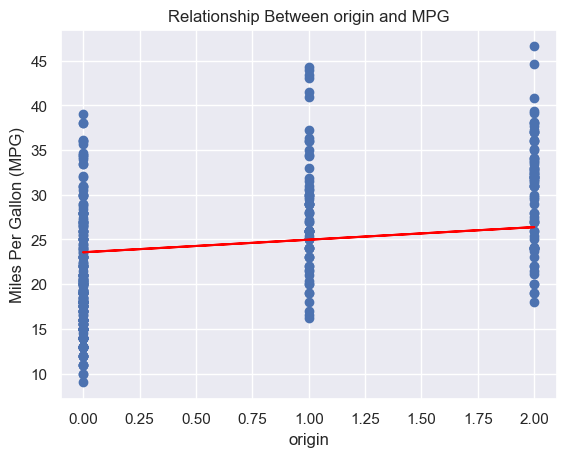

In [58]:
#This is a scatter plot visualization showing the relationship between the acceleration feature and how it impacts the MPG.
x = mpg_preprocessed['origin']
y = mpg_preprocessed['mpg']

yhat = 1.4061*x + 23.568059
plt.plot(x, yhat, c = 'red', label = 'Regression Line')
plt.scatter(x, y)
plt.xlabel('origin')
plt.ylabel('Miles Per Gallon (MPG)')
plt.title('Relationship Between origin and MPG')
plt.show()

# It shows that it follows a Linear Regression, so we are still on point.

<Axes: xlabel='horsepower', ylabel='mpg'>

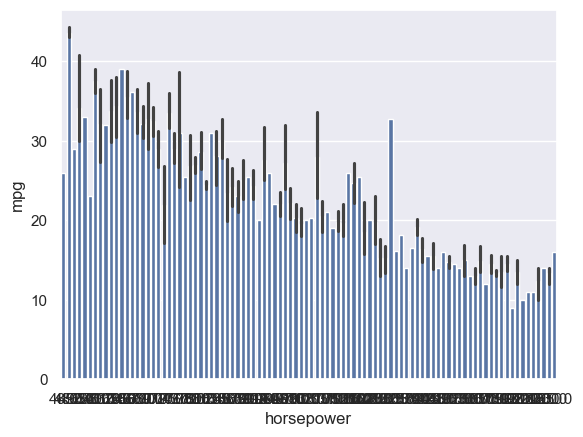

In [61]:
#Bar plot showing how horsepower affects fuel efficiency
sns.barplot(
    x = "horsepower",
    y = "mpg",
    data = mpg_preprocessed,
    )

# TRAIN-TEST SPLIT

In [63]:
#Train-Test Split
# this is to split the data into training and testing sets which allows us to evaluate the model's performance
#training is 80% while test is 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (inputs_scaled, targets, test_size = 0.2, random_state = 365)
x_train, x_test, y_train, y_test

(array([[ 0.60595194, -0.1193204 ,  0.14496574, ...,  0.3020488 ,
          1.62198339, -0.71514478],
        [ 1.35960466,  1.04259084,  0.93131125, ...,  0.15681724,
         -1.08585801, -0.71514478],
        [-0.90135351, -0.40739757, -0.3792646 , ..., -0.85980367,
          0.80963097, -0.71514478],
        ...,
        [ 1.35960466,  1.5035143 ,  1.32448401, ..., -0.24256954,
          0.80963097, -0.71514478],
        [-0.90135351, -0.69547474,  0.27602332, ..., -0.75088   ,
         -0.27350559,  0.53322199],
        [-0.90135351, -0.70507731, -0.19578399, ..., -0.3878011 ,
         -1.08585801,  1.78158875]]),
 array([[-9.01353508e-01, -6.09051589e-01, -6.47263994e-02,
          2.12319946e-01,  4.78935730e-02, -2.72144865e-03,
          5.33221985e-01],
        [-9.01353508e-01, -6.85872167e-01, -4.84110673e-01,
         -6.80350097e-01,  1.56817242e-01, -1.08585801e+00,
         -7.15144780e-01],
        [-9.01353508e-01, -9.93154479e-01, -7.72437362e-01,
         -1.0196829

# INITIALISE AND TRAIN MODEL USING LINEAR REGRESSION

In [66]:
reg = LinearRegression()
#Train the model using the training data
reg.fit(x_train, y_train)

LinearRegression()

In [68]:
#Checking the coefficients
reg.coef_

array([-1.73628036,  3.00944805, -0.76229684, -5.53167655,  0.37308079,
        2.80476997,  1.05476073])

In [70]:
#Cheching the Intercept

reg.intercept_

23.575354900706106

# EVALUATE THE MODEL

In [89]:
# Make predictions on the test set
yhat = reg.predict(x_test)
yhat

array([22.75496038, 23.46739027, 27.40748403, 19.4891804 , 23.58154824,
       20.34962383, 28.44260953, 35.95121735, 33.88828108, 21.83388944,
       16.85906401, 19.82941648, 31.40514416, 24.58944099, 11.72093933,
       26.88830317, 13.50877301, 28.51822978, 15.08606394, 19.52611104,
       27.89718303, 20.71330237, 13.82038491, 26.63917021, 23.42460418,
       10.66129282, 12.2617807 , 20.24189657, 30.13687726, 26.15862588,
       30.61257898, 27.33555502, 29.99224273, 22.31964481, 27.05308901,
       36.15590441, 20.56347202, 14.96315492, 28.05063374, 22.80880208,
        9.21942568, 27.28559501, 28.76160815, 11.11645148, 25.59898045,
       23.73975285, 14.47932048, 14.69473249, 25.7733678 , 30.07365405,
       31.86007598, 20.25801634, 27.28062401, 21.28989234, 14.88604268,
       30.47907127, 10.31963212, 25.14143235, 36.43756663, 34.52151219,
       33.67736937, 31.57963221, 25.99066227, 19.68640167, 21.49730518,
       23.86669332, 26.07591958, 31.1014505 , 31.07813626, 33.73

In [83]:
#R-Squared test set
RSq = reg.score(x_test, y_test)
print(f'R-Squared: {RSq}')

R-Squared: 0.7926733646060331


In [85]:
#R-Squared training set
RSq = reg.score(x_train, y_train)
print(f'R-Squared: {RSq}')

R-Squared: 0.8313153222889392


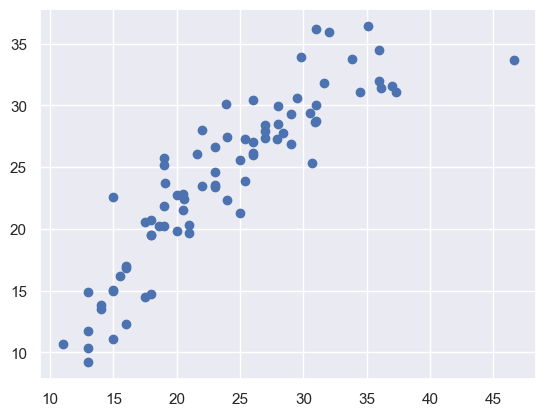

In [87]:
#create a scatter plot of the test set against the predicted to check if it follows a linear regression
plt.scatter(y_test, yhat)
plt.show()

C:\Users\DEEBEE\AppData\Local\Temp\ipykernel_18224\3032735264.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - yhat)


<Axes: xlabel='mpg', ylabel='Density'>

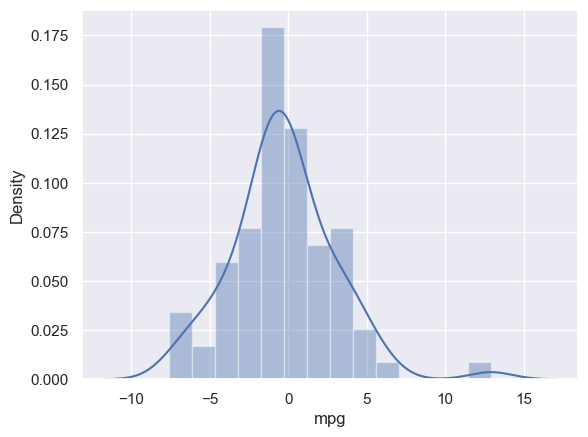

In [93]:
#this is a chart showing the difference between the initial and predicted respectively
sns.distplot(y_test - yhat)

In [95]:
#Summary Table
reg_summary = pd.DataFrame([['intercept'], ['cylinders'], ['displacement'], ['horsepower'], ['weight'],	['acceleration'], ['model year'], ['origin']], columns = ['Features'])
reg_summary['coefficients'] = reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5], reg.coef_[6]
reg_summary

,Features,coefficients
0,intercept,23.575355
1,cylinders,-1.736280
2,displacement,3.009448
3,horsepower,-0.762297
4,weight,-5.531677
5,acceleration,0.373081
6,model year,2.804770
7,origin,1.054761


- **Key findings**:
  - **More cylinders**, **more horsepower**, and **more weight** all negatively affect mpg, which is expected, as these factors are generally linked to larger, less fuel-efficient cars.
  - **Displacement** and **acceleration** seem to have a **positive relationship** with mpg, which could be due to newer or more efficient cars in the dataset.
  - **Model year** is strongly positively associated with mpg, reflecting technological improvements in fuel efficiency over time.
  - **Origin** also seems to have a positive effect on mpg, possibly due to different manufacturing standards or regional focus on fuel economy.

- **Conclusion**: The model suggests that for better fuel efficiency (higher mpg), you would likely want a newer, lighter car with fewer cylinders, less horsepower, and better acceleration. The region of origin may also play a role in determining how fuel-efficient the car is.


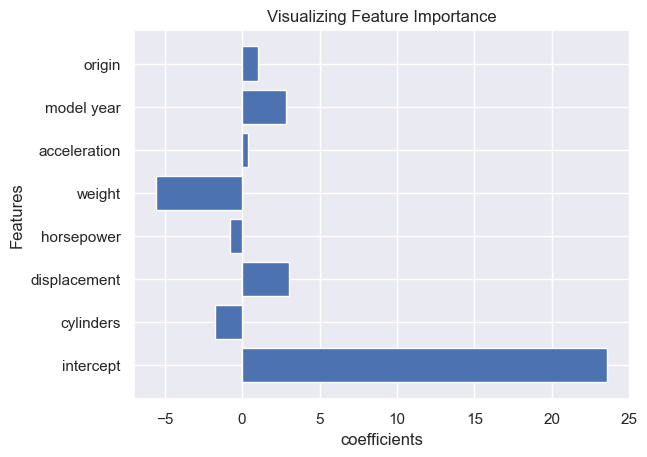

In [98]:
x = reg_summary['Features']
y = reg_summary['coefficients']
plt.barh(x, y)
plt.ylabel('Features')
plt.xlabel('coefficients')
plt.title('Visualizing Feature Importance')
plt.show()

In [100]:
#Cheching for p_values
p_values = f_regression (x_train, y_train)[1]

p_values.round(3)

array([0., 0., 0., 0., 0., 0., 0.])

In [104]:
Data_Pred = pd.DataFrame(yhat, columns = ['Prediction'])
Data_Pred.head()

,Prediction
0,22.754960
1,23.467390
2,27.407484
3,19.489180
4,23.581548


# COMPARISON BETWEEN TARGET AND PREDICTION

In [106]:
#checking the initial and predicted data side by side to see if your model works (comparison)
Data_Pred['Target'] = (y_test.reset_index(drop=True))
Data_Pred.head()

,Prediction,Target
0,22.754960,20.0
1,23.467390,22.0
2,27.407484,24.0
3,19.489180,18.0
4,23.581548,23.0


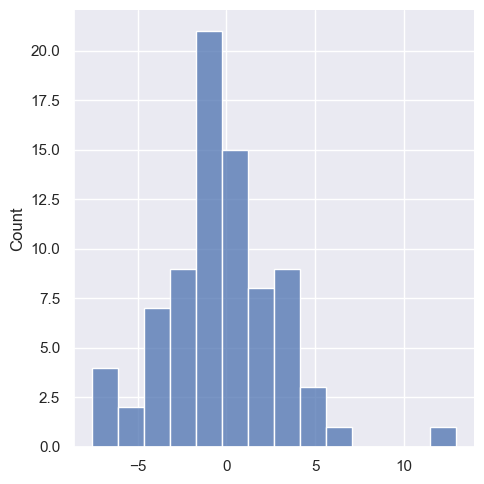

In [108]:
#This is the difference between the initial (Target) and the predicted (Prediction) respectively
sns.displot(Data_Pred['Target'] - Data_Pred['Prediction'])

In [114]:
Data_Pred['Residual']= Data_Pred['Target'] - Data_Pred['Prediction']
Data_Pred['Residual']

0    -2.754960
1    -1.467390
2    -3.407484
3    -1.489180
4    -0.581548
        ...   
75    4.021424
76   -0.657308
77   -7.591299
78    1.083837
79    5.348845
Name: Residual, Length: 80, dtype: float64

In [116]:
#difference percentage
Data_Pred['Difference%'] = np.absolute(Data_Pred['Residual']/Data_Pred['Target']*100)
Data_Pred

,Prediction,Target,Residual,Difference%
0,22.754960,20.0,-2.754960,13.774802
1,23.467390,22.0,-1.467390,6.669956
2,27.407484,24.0,-3.407484,14.197850
3,19.489180,18.0,-1.489180,8.273224
4,23.581548,23.0,-0.581548,2.528471
...,...,...,...,...
75,31.978576,36.0,4.021424,11.170621
76,16.157308,15.5,-0.657308,4.240694
77,22.591299,15.0,-7.591299,50.608657
78,29.416163,30.5,1.083837,3.553564


In [118]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax

pd.options.display.max_rows = 999

# Moreover, to make the dataset clear, we can display the result with only 2 digits after the decimal point 

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Finally, we sort by difference in % and manually check the model

Data_Pred.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
62,25.99,26.00,0.01,0.04
69,33.74,33.80,0.06,0.18
37,14.96,15.00,0.04,0.25
18,15.09,15.00,-0.09,0.57
29,26.16,26.00,-0.16,0.61
50,31.86,31.60,-0.26,0.82
11,19.83,20.00,0.17,0.85
73,29.31,29.00,-0.31,1.07
31,27.34,27.00,-0.34,1.24
22,13.82,14.00,0.18,1.28


In [120]:
Data_Pred.describe()

,Prediction,Target,Residual,Difference%
count,80.00,80.00,80.00,80.00
mean,24.11,23.81,-0.30,10.69
std,6.81,7.27,3.30,9.65
min,9.22,11.00,-7.59,0.04
25%,20.14,18.00,-1.89,3.46
50%,25.25,23.00,-0.47,7.32
75%,28.90,29.00,1.35,15.26
max,36.44,46.60,12.92,50.61


# SUMMARY

1.This model predicts the Miles Per Gallon (mpg) usage of automobiles based on different features such as cylinders, displacement, weight, acceleration	model, year and origin. Car name was initially a determinant variable but was dropped along the line since it has no significant impact on the mpg consumption of the automobiles.

2. From the description table, we can see that the minimum difference in % = 0.04% which is spot on.
   
3. The maximum difference in % = 50.61%, which is not too off track either.
 
4. Looking at the percentiles too, most of the predictions are relatively close.

5. R-Squared value of the whole dataset is 82% and this means that our independent variables (inputs) in the model explains a significant portion of the variation in the dependent variable. It also means that the fuel consumption per mile (mpg) is explained by the model.

6. the R-Squared value of the trained set is 79% while the R-Squared value of the test set is 83%

